<a href="https://colab.research.google.com/github/Varun-Mulchandani/Reddit-Flair-Classifier/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('reddddddit.csv')

In [12]:
data.head()

,author,authors,body,comment,comms_num,created,flair,id,score,title,url,combined_features
0,dhavalcoholic,ICICIPruLifeIns,reposting lack activity r askindiahello last y...,dear policy holder dhavalcoholic request help ...,1,1.386254e+09,AskIndia,1s57oi,1,need feedback insurance policy took xpost aski...,https://www.reddit.com/r/india/comments/1s57oi...,need feedback insurance policy took xpost aski...
1,amitkumarthakur,RAD-Business RAD-Business None barcam10 _snor...,24hrs local police station register case dont ...,calm downgo sp office town file grievance imme...,24,1.554080e+09,AskIndia,b7pvwt,94,somebody want kill full family,https://www.reddit.com/r/india/comments/b7pvwt...,somebody want kill full familycalm downgo sp o...
2,FrustratedOCIHopeful,plshelpthedog ayyylmaaaoo Proper_Boysenberry ...,hello askindia first time poster long time lur...,honestly supervisor behaved exactly government...,27,1.555361e+09,AskIndia,bdfid1,10,ambassador india takes back newly issued oci c...,https://www.reddit.com/r/india/comments/bdfid1...,ambassador india takes back newly issued oci c...
3,aloo_vs_bhaloo,vcdarklord tilismilis aloo_vs_bhaloo dogaa fo...,r tooafraidtoask india edition,modi control sex desires jerk someone else pro...,22,1.566529e+09,AskIndia,cu1xn4,18,randians afraid ask,https://www.reddit.com/r/india/comments/cu1xn4...,randians afraid askmodi control sex desires je...
4,multubunu,NaN,hello submitted r raskindia week ago got answe...,NaN,0,1.361085e+09,AskIndia,18ntue,0,askindia cingari cengar tzengar,https://www.reddit.com/r/india/comments/18ntue...,askindia cingari cengar tzengarhttps://www.red...


Here, I have tried to determine from the data if any particular author has a noticeable pattern where his/her posts come under a certain class.
Takeaway:
- Since the majority of the authors have less than 5 posts, I have not considered this as a viable attribute as something the model can learn from.
- The above paired with the fact that certain users may post something in a genre that they have not posted about before.

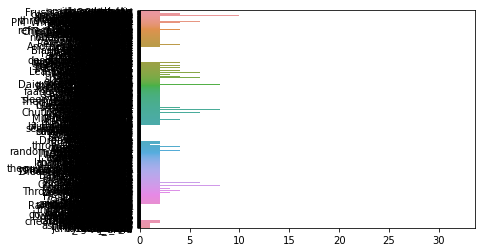

In [33]:
from collections import Counter
authors = list(data['author'])

x = list(Counter(authors).keys())
y = list(Counter(authors).values())

sns.barplot(y, x)

In [41]:
y_highest = list(y).index(max(list(y)))
x_highest = x[y_highest]
x_highest

'ppatra'

This is more evident with the scatterplot below.
Takeaway:
- There is an even distribution where each author has posts in a with different flairs.

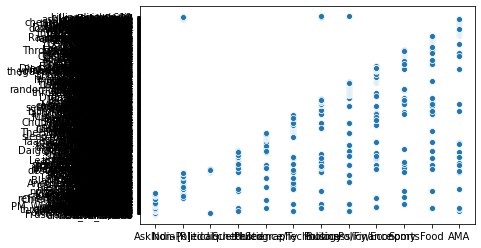

In [8]:
x = list(data['flair'])
y = list(data['author'])
sns.scatterplot(x, y)

In [0]:
#typ =[]
#for i in range(len(list(data['flair']))):
#  if list(data['author'])[i] == 'ppatra':
#    typ.append(list(data['flair'])[0])
#typ

Here, we see that posts with the flair sports has the highest number of points.
Takeaway:
- 

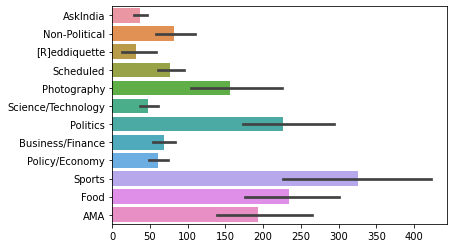

In [31]:
x = list(data['flair'])
y = list(data['score'])

sns.barplot(y, x)

Establishing the number of posts for each class in our dataset
Takeaway:
- With the exception of the flair '[R]edditique' all classes have the same number of posts. 

Text(0.5, 0, 'counts')

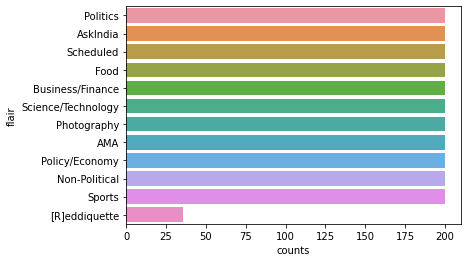

In [11]:
x = data.flair.value_counts()
sns.barplot(x, x.index)
plt.gca().set_ylabel('flair')
plt.gca().set_xlabel('counts')

To understand if there is a correlation between the number of characters in a post and its corresponding flair.
Takeaway:
- There is little to no correlation as different classes have similar distributions.

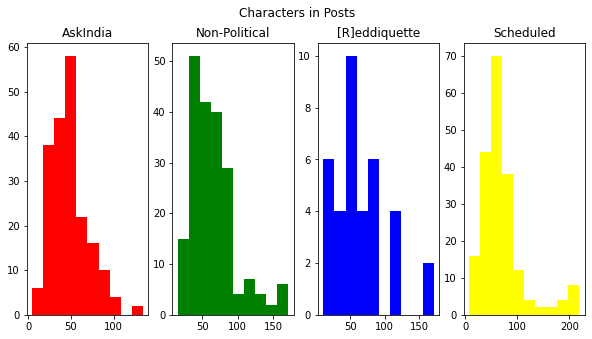

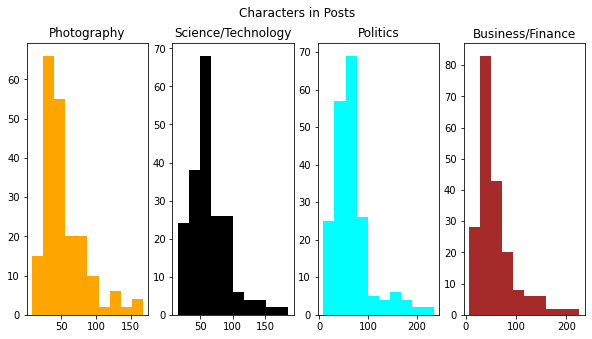

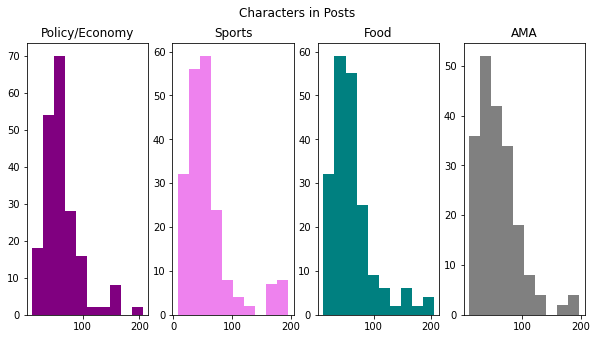

In [25]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(10,5))
data_len=data[data['flair']=='AskIndia']['title'].str.len()
ax1.hist(data_len,color='red')
ax1.set_title('AskIndia')
data_len=data[data['flair']=='Non-Political']['title'].str.len()
ax2.hist(data_len,color='green')
ax2.set_title('Non-Political')
data_len=data[data['flair']=='[R]eddiquette']['title'].str.len()
ax3.hist(data_len,color='blue')
ax3.set_title('[R]eddiquette')
data_len=data[data['flair']=='Scheduled']['title'].str.len()
ax4.hist(data_len,color='yellow')
ax4.set_title('Scheduled')
fig.suptitle('Characters in Posts')
plt.show()
fig,(ax5,ax6,ax7,ax8)=plt.subplots(1,4,figsize=(10,5))
data_len=data[data['flair']=='Photography']['title'].str.len()
ax5.hist(data_len,color='orange')
ax5.set_title('Photography')
data_len=data[data['flair']=='Science/Technology']['title'].str.len()
ax6.hist(data_len,color='black')
ax6.set_title('Science/Technology')
data_len=data[data['flair']=='Politics']['title'].str.len()
ax7.hist(data_len,color='cyan')
ax7.set_title('Politics')
data_len=data[data['flair']=='Business/Finance']['title'].str.len()
ax8.hist(data_len,color='brown')
ax8.set_title('Business/Finance')
fig.suptitle('Characters in Posts')
plt.show()
fig,(ax9,ax10,ax11,ax12)=plt.subplots(1,4,figsize=(10,5))
data_len=data[data['flair']=='Policy/Economy']['title'].str.len()
ax9.hist(data_len,color='purple')
ax9.set_title('Policy/Economy')
data_len=data[data['flair']=='Sports']['title'].str.len()
ax10.hist(data_len,color='violet')
ax10.set_title('Sports')
data_len=data[data['flair']=='Food']['title'].str.len()
ax11.hist(data_len,color='teal')
ax11.set_title('Food')
data_len=data[data['flair']=='AMA']['title'].str.len()
ax12.hist(data_len,color='grey')
ax12.set_title('AMA')
fig.suptitle('Characters in Posts')
plt.show()
fig.suptitle('Characters in Posts')
plt.show()

In [0]:
def create_corpus(l):
  corpus = []
  for x in data[data['flair'] in l]['title'].str.split():
    for i in x:
      corpus.append(i)
  return corpus